##GME stock price to r/wallstreetbets posts per day (PPD) linear regression model

The stock price for Gamestop and the subreddit r/wallstreetbets are incredibly linked as the subreddit deals with dumb stock options and bets. However, in January of 2021, news spread of firms shorting the GME stock and this subreddit rallied to pump its price in an effort to cost big firms millions in their shorts. They succeeded, and r/wallstreetbets became popular due to media coverage on GME. Ever since, their daily posting numbers are rather linked to the price of GME.

The following little project is a simple linear regression practice to re-familiarize myself with some data management and plotting.



In [71]:
import matplotlib.pyplot as plt
import math
import csv
from sklearn.linear_model import LinearRegression
import numpy as np

In [70]:
#manually entered subreddit stats of posts per day on wallstreetbets

ppdCount = [153, 263, 40, 5, 715, 506, 243, 121, 260, 229, 400, 1152, 329, 18552, 4893, 1157, 376, 4000, 690, 172, 688, 411, 838, 691, 372, 93, 152, 323, 377, 340, 187, 202]
for entry in range(len(ppdCount)): #reduce number of posts by factor of 100 for readability in comparison to GME price
  ppdCount[entry] = ppdCount[entry]/100

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 <a list of 32 Text major ticklabel objects>)

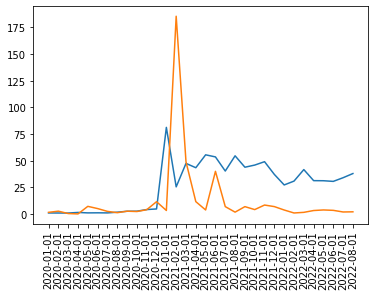

In [69]:
gmeFile = open("GME.csv", "r") #read GME price data csv

gmeDate = []
gmeADJ = []

fileReader = csv.reader(gmeFile)

dontEval = ["7", "8", "9"]

for line in fileReader: #sorts data into lists
  if line[0] == "Date": continue
  if line[0][3] in dontEval: continue #eliminates data from 2017-2019, not relevant
  gmeDate.append(line[0])
  gmeADJ.append(float(line[5]))

#Plots showing correlation between r/wallstreetbets posts per day and GME price. Strong correlation
plt.plot(gmeDate, gmeADJ)
plt.plot(gmeDate, ppdCount)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'r/wallstreetbets PPD to GME Stock Price Linear Regression')

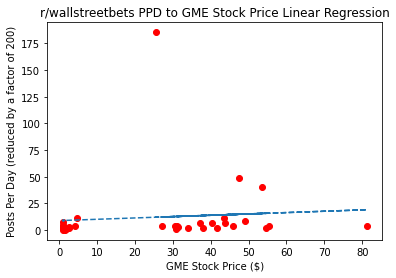

In [68]:
coef = np.polyfit(gmeADJ, ppdCount, 1) #a coefficient for linear regression function based on factor between price and PPD
poly1d_fn = np.poly1d(coef) #creates function based on coefficient

plt.plot(gmeADJ, ppdCount, "ro", gmeADJ, poly1d_fn(gmeADJ), '--') #plots price and PPD as red points, plots function as dotted line
#Labels and title
plt.xlabel("GME Stock Price ($)")
plt.ylabel("Posts Per Day (reduced by a factor of 200)")
plt.title("r/wallstreetbets PPD to GME Stock Price Linear Regression")